# Ground state of discretized hamiltonian operator

The ground state corresponds to the lowest eigenvalue and eigenfunction pair of the Hamilton operator.
Taking advantage of the fact the hamilton operator behaves like a positive definite matrix we shall call $A$, we can use the power method to determine the largest eigenvalue and eigenvector of $A$.
The largest eigenvalue of the matrix $A^{-1}$ is exatly the smallest eigenvalue of the matrix $A$. Conveniently, we can use the conjugate gradient method to determine the inverse of the matrix $A^{-1}$ applied (for example vector product) on a vector.
We can take advantage of the fact the power method requires just such an operation as the conjugate gradient to iterate, we can make it calculate the largest eigenvalue of $A^{-1}$.
In both cases, only the result of the matrix operation is required, which means we can implement the hamilton operator any way we want without the need of representing it as a matrix. So, if we use the conjugate gradient on the hamilton operator function and let this result be computed by the power method, we obtain the lowest eigenvalue and eigenfunction of the Hamilton operator.

To calculate the ground state of the hamiltonian we first use a discretized lattice in 1 dimension.
We start by importing all functions required, which are implemented in the `functions.py` script

In [1]:
import functions
from functions import *
import pandas as pd

Next, we set the parameters for the lattice discretization. In this case, we chose to store them in a `parameters.csv` file. We also set the global variables in the `functions` einvironment which we will need for the function executions.

In [2]:
file_path = 'parameters.csv'
def check_columns_defined(df):
    required_columns = ['D', 'N','epsilon_2', 'mu']
    for col in required_columns:
        assert col in df.columns, f"Column '{col}' is not defined in the CSV file."

input_param = pd.read_csv(file_path, header=0)
#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
epsilon = np.sqrt(epsilon_2)
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = epsilon
functions.epsilon_2 = epsilon_2
potential_array = potential_array_calculator()
functions.potential_array = potential_array

We can now execute the `lowest_eigenvalue_vector` function, which will return the lowest eigenvector and eigenvalue.

In [8]:
lowest_EigVector_list = []
lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-8, conjugate_gradient_tolerance = 1.e-10, max_iters_power_method = 200000, max_iters_conjugate_gradient= 10000)
lowest_EigVector_list.append(lowest_EigVector)

start vector shape:  (200,)


KeyboardInterrupt: 

We can now save the eigenvalue and eigenvector in a file and calculate some obeservables for the lowest eigenvector of the hamiltonian

In [ ]:
df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'v2_eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

In [3]:
csv_file_path = 'v2_eigenvector_(1, 200, 0.001, 20).csv'
df = pd.read_csv(csv_file_path,header=None)
lowest_EigVector = df.to_numpy(dtype=complex).reshape((200,))
psi = lowest_EigVector

print("Expectation Energy:", expectation_energy(psi))
print("Expectation Momentum:", expectation_momentum(psi))
print("Expectation Position:", expectation_position(psi))
print("Indetermination Momentum:", indetermination_momentum(psi))
print("Indetermination Position:", indetermination_position(psi))
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.4861060589758955
Expectation Momentum: [[3.81394936e-10]]
Expectation Position: [[0.00029404]]
Indetermination Momentum: [[0.00590481]]
Indetermination Position: [[0.94715758]]
Probability for x > 0: 0.5001537895848851


The resulting eigenfunctions are sometimes symmetrical and antisymmetrical, whereby the amplitudes of anti-nodes vary for each calculation. The extremes of the eigenfunction are exactly at $x = \pm r$, which is the position of the minima of the potential $V$. This coincides with our expectations. We expect the symmetric wavefunction to be the ground state for given potential. Both the fact that some of the results are antisymmetric and without fixed amplitude suggests some form of inconsistenticy in  the iterative process producing the results. \
Such effects can be observed when the precision of the iterative approximations is set too. This leads to the determination of the next highest state above the ground state, which would be the antisymmetrical function observed.

We shall no focus on the symmetrical eigenfunction we just calculated:

c:\Users\crpdn\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


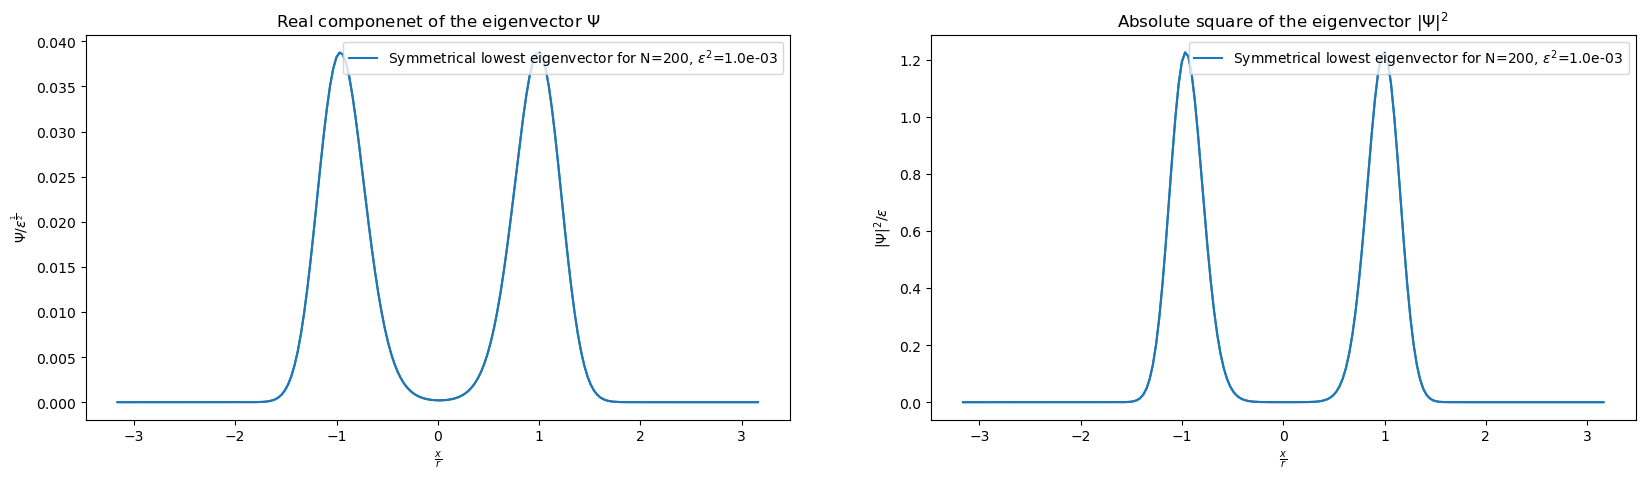

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
legend1 = ax1.get_legend()
legend2 = ax2.get_legend()
ax1.set_title(fr'Real componenet of the eigenvector $\Psi$')
ax2.set_title(fr'Absolute square of the eigenvector $|\Psi|^{2}$')
ax1.set_xlabel(r"$\frac{x}{r}$")
ax2.set_xlabel(r"$\frac{x}{r}$")
ax1.set_ylabel(r"$\Psi/ \varepsilon^{\frac{1}{2}}$")
ax2.set_ylabel(r"$|\Psi|^{2}/ \varepsilon$")
x_axis = np.linspace(-N/2,N/2,N)
x_axis= x_axis*epsilon


if np.sum(lowest_EigVector[:int(N/2)])<=0 and np.sum(lowest_EigVector[int(N/2):])<=0 or np.sum(lowest_EigVector[:int(N/2)])>=0 and np.sum(lowest_EigVector[int(N/2):])>=0:
    #x_expected = (expectation_position(lowest_EigVector)-N/2)*epsilon
    #x_indetermination = (indetermination_position(lowest_EigVector)-N/2)*epsilon
    ax1.plot(x_axis,lowest_EigVector.real/epsilon**(0.5),color='C0')
    ax2.plot(x_axis,-lowest_EigVector**2/epsilon,color='C0')
else:
    ax1.plot(x_axis,lowest_EigVector.real/epsilon**(0.5),color='C1')
    ax2.plot(x_axis,-lowest_EigVector**2/epsilon,color='C1')
    #plt.axvline(x=x_expected, color='red', linestyle='-', label='Expectation Position')
ax1.plot(x_axis,lowest_EigVector/epsilon**(0.5), color = 'C0', label = fr'Symmetrical lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
ax2.plot(x_axis,-lowest_EigVector**2/epsilon, color = 'C0',  label = fr'Symmetrical lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
# ax2.plot(x_axis,lowest_EigVector.real**2/epsilon, color='k',label = fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
# ax2.plot(x_axis,lowest_EigVector.real**2/epsilon, color='k',label = fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.show()


## Infinite volume limit and continuum limit

We want to discuss the performance of ground state algorithm for the infinite volume limit $L \rightarrow \infty$ and the continuum limit $a \rightarrow 0$.

We will now calculate the lowest eingenfunction while iterating over incresingly large L with incresingly small $a$ and will discuss how the eigenfunction and expectation values behave.

To realize this in the context of lattice discretization, we will iterate over the dimensionless parameters $L/r$ and $a/r$:

In [28]:
lowest_EigVector_list = []
ar_list = [0.1, 0.05, 0.01]
Lr_list = [3, 5, 10]
for a_over_r in ar_list :
    for L_over_r in Lr_list :  

        N = int(L_over_r/a_over_r)
        epsilon = L_over_r/N    
        epsilon_2 = epsilon**2
        
        

        functions.N = N
        functions.D = D
        functions.epsilon = np.sqrt(epsilon_2)
        functions.epsilon_2 = epsilon_2
        potential_array = potential_array_calculator()
        functions.potential_array = potential_array
        
    
        lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,   power_method_tolerance = 1.e-6, conjugate_gradient_tolerance = 1.e-10, max_iters_power_method = 200000, max_iters_conjugate_gradient= 10000)
        lowest_EigVector_list.append(lowest_EigVector)



start vector shape:  (30,)
start vector shape:  (50,)06/200000
start vector shape:  (100,)6114/200000
start vector shape:  (60,)23454/200000
start vector shape:  (100,)5/200000
start vector shape:  (200,)9881/200000
start vector shape:  (300,)6220/200000
start vector shape:  (500,)8/200000
start vector shape:  (1000,)145/200000


For each set of lattice constants we can now observe the infinite volume limit. We notice that even for relatively small volumes $L$ (in this case 1-dimensional), the infinite volume limit is reached i.e. the wavefunctions become identical. This is due to the shape of the potential, which approaches infinity quickly for $L\rightarrow \infty$. Therefore increasing the volume over which we calculate the eigenfunction will have close to no impact, as the eigenfunciton becomes 0 towards infinity.
Note how increasing the volume with constant lattice spacing requires an increase in lattice points. To show how the wavefunctions overlap, the plot has been limited to the range $-3\leq x/r\leq 3$.

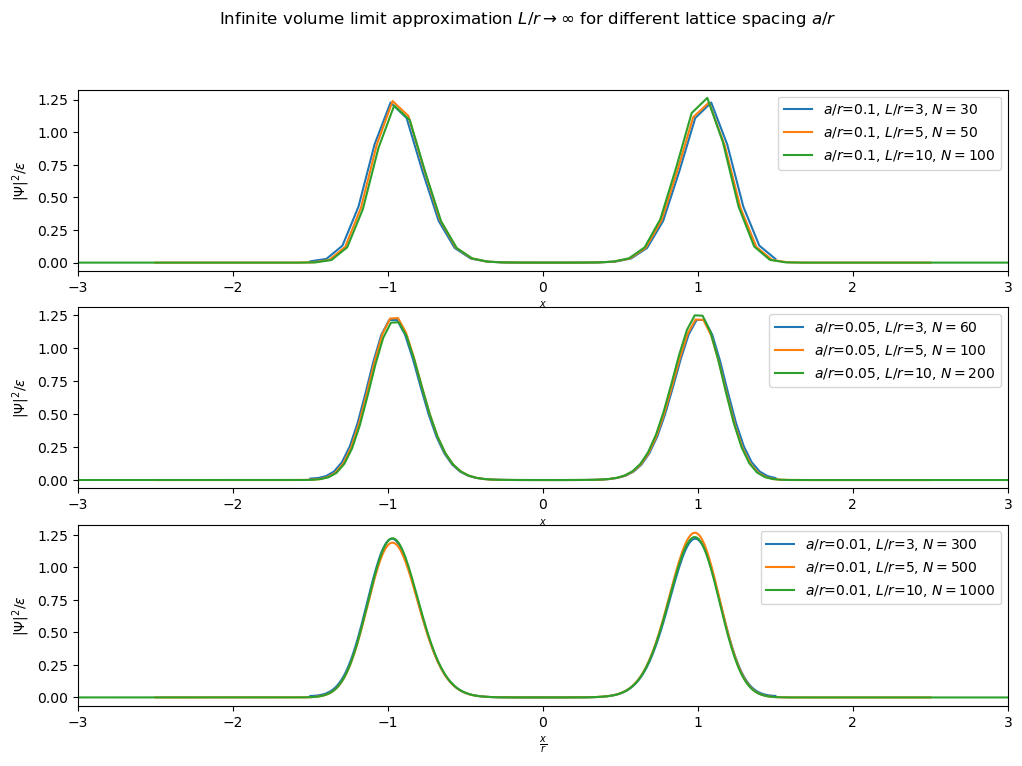

In [82]:

fig, axes = plt.subplots(nrows=len(ar_list), ncols=1, figsize=(12, 8))
fig.suptitle(fr'Infinite volume limit approximation $L/r \rightarrow \infty$ for different lattice spacing $a/r$')


for i, a_over_r in enumerate(ar_list):
    ax = axes[i]
    
    for j, L_over_r in enumerate(Lr_list):
        N = int(L_over_r/a_over_r)
        epsilon = L_over_r/N    
        x_axis = np.linspace(-N/2,N/2,N)
        x_axis= x_axis*epsilon
    
        ax.plot(x_axis,np.abs(lowest_EigVector_list[i*len(ar_list)+j]**2)/epsilon, label = fr'$a/r$={a_over_r}, $L/r$={L_over_r}, $N = {N}$')
    ax.set_xlim(-3,3)
    ax.set_xlabel(r"$\frac{x}{r}$")
    ax.set_ylabel(r"$|\Psi|^{2}/ \varepsilon$")
    ax.legend(loc='upper right')
    #ax2.legend(loc='upper right')
plt.show()



Now that we observed the infinite volume limit for large $L$, we can compare how the continuum limit is reached by reducing the lattice spacing $a/r$. Plotting the eigenfunctions shows how they converge for $a/r \rightarrow 0$.

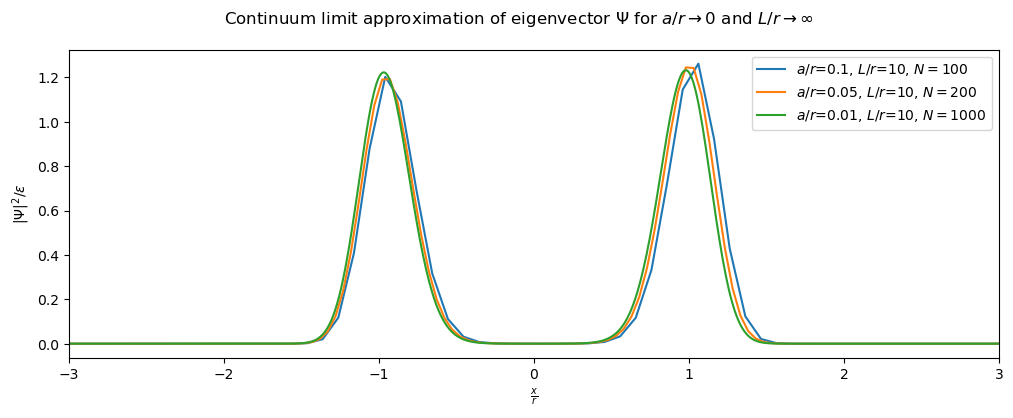

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
fig.suptitle(fr'Continuum limit approximation of eigenvector $\Psi$ for $a/r\rightarrow 0$ and $L/r \rightarrow \infty$')


for i, a_over_r in enumerate(ar_list):
    ax = axes
    L_over_r = Lr_list[-1]

    N = int(L_over_r/a_over_r)
    epsilon = L_over_r/N    
    epsilon_2 = epsilon**2
    x_axis = np.linspace(-N/2,N/2,N)
    x_axis= x_axis*epsilon

    ax.plot(x_axis,np.abs(lowest_EigVector_list[i*len(ar_list)+len(Lr_list)-1]**2)/epsilon, label = fr'$a/r$={a_over_r}, $L/r$={L_over_r}, $N = {N}$')
    ax.set_xlim(-3,3)
    ax.set_xlabel(r"$\frac{x}{r}$")
    ax.set_ylabel(r"$|\Psi|^{2}/ \varepsilon$")
    ax.legend(loc='upper right')
    #ax2.legend(loc='upper right')
plt.show()

We can also compare the observables of the eigenfunctions in the continuum limit. We observe that the variation for increasingly smaller lattice spacing is minimal for all expectation values calculated.

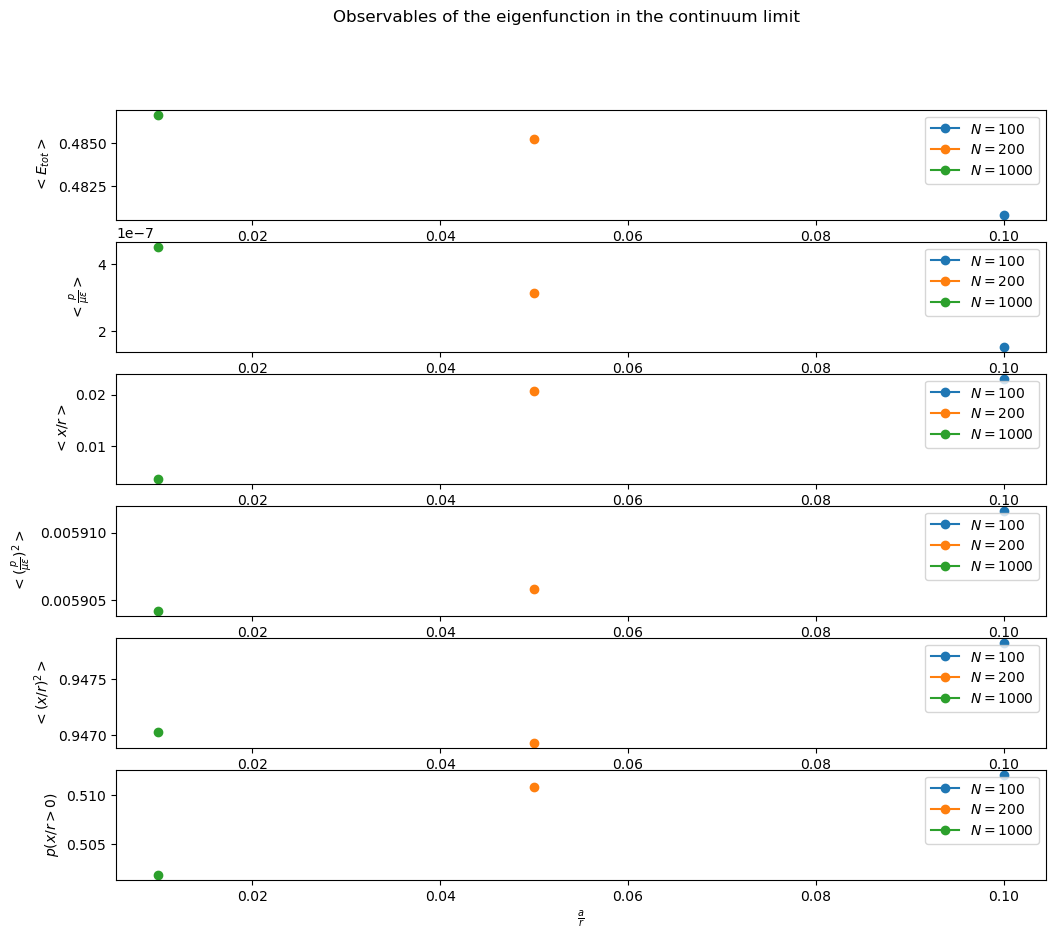

In [83]:
expectation_values = [expectation_energy,expectation_momentum, expectation_position, indetermination_momentum, indetermination_position, probability_xg0]
names = [r'$<E_{tot}>$', r'$<\frac{p}{\mu \varepsilon}>$', r'$<x/r>$', r'$<(\frac{p}{\mu \varepsilon})^{2}>$', r'$<(x/r)^{2}>$', r'$p(x/r>0)$']
fig, axes = plt.subplots(nrows=len(expectation_values), ncols=1, figsize=(12, 10))
fig.suptitle(fr'Observables of the eigenfunction in the continuum limit')

for j, exp in enumerate(expectation_values):
    ax = axes[j]
    for i, a_over_r in enumerate(ar_list):
        
        
        L_over_r = Lr_list[-1]

        N = int(L_over_r/a_over_r)
        D = 1
        epsilon = L_over_r/N    
        epsilon_2 = epsilon**2
        functions.N = N
        functions.D = D
        functions.epsilon = np.sqrt(epsilon_2)
        functions.epsilon_2 = epsilon_2
        functions.potential_array = potential_array_calculator()
        expectation_value = exp(lowest_EigVector_list[i*len(ar_list)+len(Lr_list)-1])
        
        ax.plot(a_over_r,np.abs(expectation_value),'o-',  label = fr'$N = {N}$')
        
        ax.set_ylabel(names[j])
        ax.legend()
        #ax2.legend(loc='upper right'
axes[-1].set_xlabel(r"$\frac{a}{r}$")
plt.show()

## Two dimensional ground state

Next we calculate the ground state of the hamiltoninan for a discrete lattice in 2 dimensions. 

In [ ]:
file_path = 'parameters2.csv'

input_param = pd.read_csv(file_path, header=0)



#check all columns are defined
check_columns_defined(input_param)
#import values from csv
epsilon_2= input_param["epsilon_2"].iloc[0]
N = input_param["N"].iloc[0]
#epsilon = L_over_r/N
D = input_param["D"].iloc[0]
mu = input_param["mu"].iloc[0]
#epsilon_2 = epsilon**2
#broadcast values to functions
functions.N = N
functions.D = D
functions.mu = mu
functions.epsilon = np.sqrt(epsilon_2)
functions.epsilon_2 = epsilon_2
functions.potential_array = potential_array_calculator()
#calculate lowest eigenvalue and eigenvector
lowest_EigValue, lowest_EigVector = lowest_eigenvalue_vector(hamiltonian_function,  power_method_tolerance = 1.e-4, conjugate_gradient_tolerance = 1.e-4, max_iters_power_method = 20000, max_iters_conjugate_gradient= 10000)


start vector shape:  (200, 200)


We notice the very long computational time required to determine the eigenvalue and eigenfunction for the given parameters while having considerably lower tolerance for the power method.


In [ ]:

df_EigVector = pd.DataFrame(lowest_EigVector)
df_EigVector.to_csv(f'v2_eigenvector_{D, N, epsilon_2, mu}.csv', header=None, index=None, sep = ',')

# Initialize arbitrary plane wave function
psi = lowest_EigVector
print("Expectation Energy:", expectation_energy(psi))
print("Expectation Momentum:", expectation_momentum(psi))
print("Expectation Position:", expectation_position(psi))
print("Indetermination Momentum:", indetermination_momentum(psi))
print("Indetermination Position:", indetermination_position(psi))
print("Probability for x > 0:", probability_xg0(psi))

Expectation Energy: 0.47869354249928453
Expectation Momentum: [[-1.49381457e-05]
 [ 1.89785061e-05]]
Expectation Position: [[ 99.99413448]
 [100.02333322]]
Indetermination Momentum: [[0.01138353]
 [0.0113835 ]]
Indetermination Position: [[472.51986325]
 [472.51959827]]
Probability for x > 0: 0.5053104612364222


We can now plot the eigenfunction:

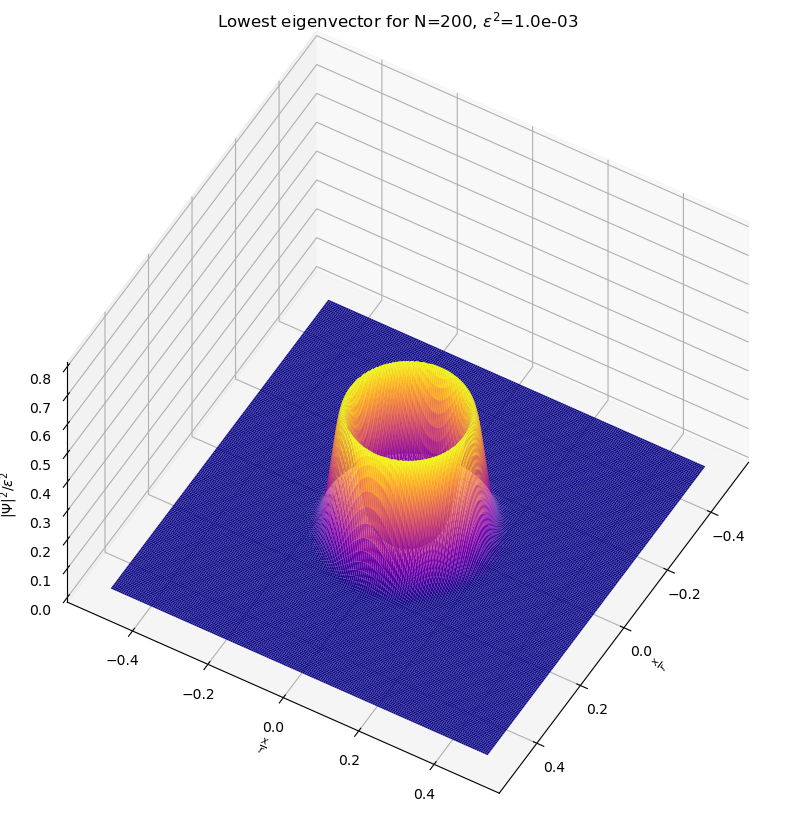

In [ ]:
x_axis = np.linspace(-N/2,N/2,N)
y_axis = np.linspace(-N/2,N/2,N)
X,Y = np.meshgrid(x_axis*epsilon,y_axis*epsilon)
x_expected = (expectation_position(lowest_EigVector)[0][0]-N/2)*epsilon
y_expected = (expectation_position(lowest_EigVector)[1][0]-N/2)*epsilon
x_indetermination = (indetermination_position(lowest_EigVector)[0][0])*epsilon


hf = plt.figure(figsize=(10,20))
ha = hf.add_subplot(111, projection='3d')
ha.view_init(elev=50, azim=30)
ha.set_proj_type('ortho')
plt.title(fr'Lowest eigenvector for N={N}, $\epsilon^{2}$={epsilon_2:.1e}')
plt.xlabel(r"$\frac{x}{r}$")
plt.ylabel(r"$\frac{x}{r}$")


ha.set_zlabel(r"$|\Psi|^{2}/ \varepsilon^{2}$")

ha.plot_surface(X, Y, np.abs((lowest_EigVector)**2)/epsilon_2, cmap='plasma', rstride=1, cstride=1, linewidth=0, alpha=1,  label=fr'Lowest eigenvector for N={N}, $\epsilon$={epsilon_2:.1e}')
ha.set_zlim(0, 0.8)
plt.show()

The obtained eigenfunction is a radially symmetric wavefunction with maxima at $x =\pm r$. As such the determined eigenfunction fullfills our expectations for the 2-dimensional case.